# CS 6220 Assignment 3

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Helper functions

In [2]:
from PIL import Image
import os
import pandas as pd
import pylab as pl

In [3]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

## Load data

In [4]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [5]:
X = pd.DataFrame([im.histogram() for im in images])

## Assignment tasks

### Part1 [25pts]:

__The PCA projection of the image color histograms in 2 dimensions. Using the provided plot_image_space() function. This should be displayed as thumbnail images distributed within a 2-dimensional plot.__

In [6]:
from sklearn.decomposition import PCA

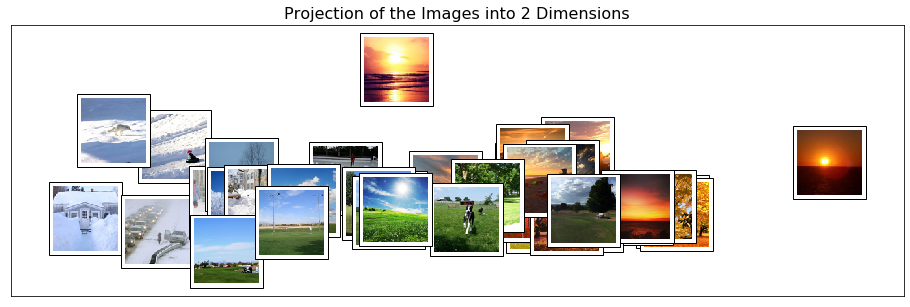

In [7]:
# Apply PCA dimensionality reduction, and project into 2-dimensional plot
pca = PCA(n_components=2)
ft = pca.fit_transform(X)
plot_image_space(images, ft)

### Part2 [25pts]:

__Given this output, What does it mean for two images to be close together in this plot?
What does it mean for two images to be far apart?__

Two images being close together in the plot means these images have similar histogram values, which include similar color values and similar pixel values, indicating these images are very likely from the same season.

Two images being far apart in the plot means these images have very different histogram values, which include very different color values and very different pixel values, indicating these images are very likely from different seasons.

### Part3 [50pts]:

__Once you completed the first two parts of the assignment, choose one of the following
below:<br>1. Repeat this process while using a different set of images curated by yourself.<br>2. Repeat this process using a different data reduction method and describe any similarities/differences between that experiment when compared to applying PCA.__

__We choose option 1 using a set of images of flowers from https://www.robots.ox.ac.uk/~vgg/data/flowers/17/index.html, using 30 images from three categories of flowers: bluebell, snowdrop, and sunflower.__

In [8]:
img_dir2 = os.path.join(os.getcwd(), "flowers") # directory path
images2 = load_images(img_dir2) # load images in the specified directory

In [9]:
X2 = pd.DataFrame([im.histogram() for im in images2])

In [10]:
from sklearn.decomposition import PCA

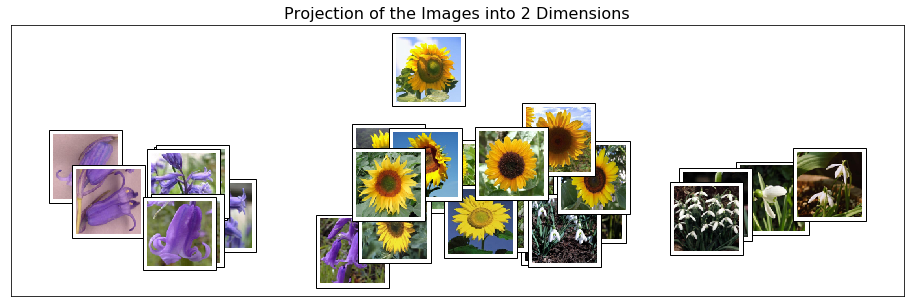

In [11]:
# Apply PCA dimensionality reduction, and project into 2-dimensional plot
pca = PCA(n_components=2)
ft2 = pca.fit_transform(X2)
plot_image_space(images2, ft2)

Two images being close together in the plot means these images have similar histogram values, which include similar color values and similar pixel values, indicating these images are very likely the flowers from the same category.

Two images being far apart in the plot means these images have very different histogram values, which include very different color values and very different pixel values, indicating these images are very likely the flowers from different categories.

From the 2d plot after applying PCA, the bluebell images mostly locate at the left side, the snowdrop images mostly locate at the right side, and the sunflower images mostly locate at the center. The result shows that PCA tends to cluster images with similar colors and shapes closer to each other.